# Using the `steiner_ellipse.py` module

## Steiner algorithm
The **Steiner algorithm** is used to find the smallest that encloses three given points: 
$\vec{p}_1$, $\vec{p}_2$ and $\vec{p}_3$.
This minimal enclosing ellipse is known as the *Steiner ellipse*, and it is centered at the 
**centroid** of the triangle formed by these three points.

In this notebook, we will implement the Steiner algorithm to find the enclosing ellipse and 
visualize it. 

The centroid $\vec{p}$ of the ellipse is calculated as the average of the three input points, 
ensuring that the ellipse is symmetrically centered with respect to these points. 
The resulting ellipse is the smallest possible ellipse that passes through the given points.

For further details on the mathematical formulation and properties of the Steiner ellipse, you can 
refer to its [Wikipedia page](https://en.wikipedia.org/wiki/Steiner_ellipse).

---

## Matrix definition of an ellipse
An ellipse can be defined with
$(\vec{u} - \vec{p})^\dag \cdot D \cdot (\vec{u} - \vec{p}) \leq 1$
where $\vec{p}$ is the center of the ellipse and $D$ is its matrix definition.
All the points $\vec{u}$ that verify this equation are inside the ellipse.

## Steiner algorithm implementation
This module contains two key functions for working with ellipses:

1. **`steiner_ellipse_def()`**:  
   This function implements the **Steiner algorithm** to find the smallest ellipse that encloses the three input points. It returns the matrix definition of the ellipse, which can be used to describe the ellipse mathematically. The returned result includes:
   - **D**: The matrix that defines the ellipse.
   - **p**: The center of the ellipse.

2. **`is_inside_ellipse()`**:  
   This function checks whether a given point lies inside the ellipse. It accepts either a single point or an array of points and returns a boolean value indicating if each point is inside the ellipse.

### Usage example
The following cells in this notebook demonstrate how to use the `steiner_ellipse_def()` function to 
compute the smallest enclosing ellipse for three points. 
Additionally, it shows how to visualize the result and verify if points are inside the ellipse 
using the `is_inside_ellipse()` function.

Import the required packages and the 'steiner_ellipse_def()' function.

In [1]:
# Import the required packages
import matplotlib.pyplot as plt
import numpy as np

# Import the Steiner function
import steiner_ellipse as se

Define the three point for which to fin the smallest ellipse.

In [2]:
p1 = (1, 0)
p2 = (0, 1)
p3 = (1, 1)

Compute the ellipse definition and print it.

D: matrix definition

p: center of the ellipse

In [3]:
D, p = se.steiner_ellipse_def(p1, p2, p3)

print("D matrix:")
print(D)
print("\nCenter of the ellipse:")
print(p)

D matrix:
[[3.  1.5]
 [1.5 3. ]]

Center of the ellipse:
[0.66666667 0.66666667]


Show the results.
The orange region is found using the 'is_inside_ellipse()' function.

C:\Users\Olivier\AppData\Local\Temp\ipykernel_38424\1431750896.py:37: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


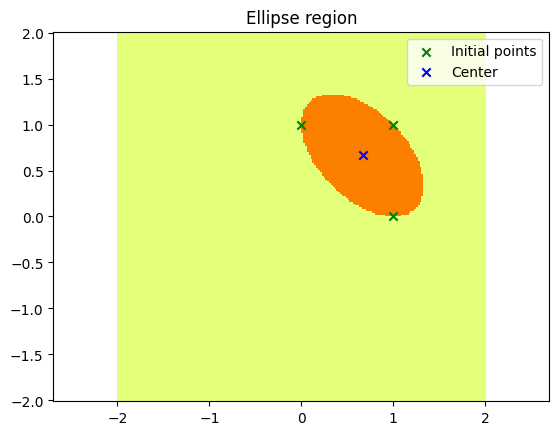

In [4]:
density = 200  # Density of points
x_range = np.linspace(-2, 2, density)
y_range = np.linspace(-2, 2, density)

x_mesh, y_mesh = np.meshgrid(x_range, y_range)
point_mesh = np.stack([x_mesh, y_mesh], axis=-1)

is_inside = se.is_inside_ellipse(point_mesh, D, p)

# Show the interior of the ellipse
plt.pcolormesh(
    x_mesh,
    y_mesh,
    is_inside,
    cmap="Wistia",
    label="Computed ellipse",
)

# Show the initial points
plt.scatter(
    [p1[0], p2[0], p3[0]],
    [p1[1], p2[1], p3[1]],
    label="Initial points",
    marker="x",
    color="g",
)

# Show the center of the ellipse
plt.scatter(
    *p,
    marker="x",
    color="b",
    label="Center",
)

plt.title("Ellipse region")
plt.legend()
plt.axis("equal")
plt.show()